# Muhamad Farhan Arya Wicaksono (5054231011)

# Vehicle Insurance Policy
---

Kita sebagai expert data yang bekerja di sebuah pekerjanan asuransi dan diberikan sebuah tugas untuk melakukan
segementasi Anggota asuransi. Perusahaan tersebut memiliki sebuah masalah yaitu Perusahaan tersebut tidak mempunyai
data label profile dari tiap Anggota Anggota asuransi nya dan menginginkan expert data tersebut untuk melakukan 
analisis profile tiap Anggota Anggota asuransinya. Dengan  dibentuknya customer profile, tim marketing dapat 
mencari customer baru sesuai dengan kriteri pengelompokan oleh tim data dan memasarkannya dengan tepat


Saat ini, perusahaan mengenakan biaya yang sama untuk setiap premi polis,  tetapi perusahaan ingin beralih ke pendekatan penetapan harga yang lebih dinamis  di mana pengemudi yang berisiko membayar lebih banyak,  dan pengemudi yang tidak terlalu berisiko membayar lebih sedikit.

# Import Library

In [235]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
import plotly.graph_objs as go
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_colwidth = 500
pd.options.display.max_columns = 20

## MetaData


In [236]:
metadata = pd.read_csv('metadata.csv', sep = ';')
metadata

,variabel,definition
0,pol_number,policy number for the insurance policy
1,pol_eff_dt,auto insurance policy effective date
2,gender,"gender of driver: F, M"
3,age cat,"driver's age category: 1 (youngest), 2, 3, 4, 5, 6"
4,date_of_birth,driver's date of birth
5,credit_score,"driver’s credit score(integer): 1-100, 1=poor, 100=excellent"
6,area driver's,"area of residence: A, B, C, D, E, F"
7,traffic_index,"traffic index of driver’s area of residence(integer): 100=country average, >100 means worse traffic conditions than average"
8,veh_age,"age of vehicle(categorical): 1 (youngest), 2, 3, 4"
9,veh_body,vehicle body coded as: BUS CONVT = convertible COUPE HBACK = hatchback HDTOP = hardtop MCARA = motorized caravan MIBUS = minibus PANVN = panel van RDSTR = roadster STNWG = station wagon TRUCK UTE = utility


| Kode   | Jenis Bodi Kendaraan    | Penjelasan                                        |
|--------|-------------------------|---------------------------------------------------|
| HBACK  | Hatchback               | Mobil dengan pintu belakang yang bisa dibuka      |
| UTE    | Utility                 | Kendaraan serbaguna, biasanya pickup              |
| COUPE  | Coupe                   | Mobil dengan dua pintu, biasanya sport            |
| SEDAN  | Sedan                   | Mobil penumpang dengan empat pintu                |
| MIBUS  | Minibus                 | Bus kecil untuk penumpang                         |
| HDTOP  | Hardtop                 | Mobil dengan atap keras yang bisa dilepas         |
| STNWG  | Station wagon           | Mobil penumpang dengan bagasi besar/panjang       |
| TRUCK  | Truck                   | Kendaraan besar untuk mengangkut barang           |
| PANVN  | Panel van               | Van untuk pengangkutan barang                     |
| MCARA  | Motorized caravan       | Karavan bermotor atau rumah mobil                 |
| BUS    | Bus                     | Kendaraan besar untuk mengangkut banyak penumpang |
| CONVT  | Convertible             | Mobil dengan atap yang bisa dibuka/dilipat        |
| RDSTR  | Roadster                | Mobil sport terbuka, biasanya dua kursi           |

Load data    

In [237]:
data = pd.read_csv('Vehicle_policies_2020.csv')
data

,pol_number,pol_eff_dt,gender,age_cat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium
0,43124327,12/30/2020,F,4.0,7/12/1968,381.0,D,133.6,2,HBACK,1.331,NaN,0,0.0,716.53
1,21919609,12/30/2020,F,2.0,11/5/1982,549.0,D,163.6,1,UTE,3.740,NaN,0,0.0,716.53
2,72577057,12/30/2020,M,2.0,11/26/1983,649.0,B,117.5,4,COUPE,0.880,NaN,0,0.0,716.53
3,92175225,12/30/2020,M,4.0,11/2/1960,743.0,B,100.7,3,SEDAN,1.045,NaN,0,0.0,716.53
4,66223239,12/30/2020,F,4.0,1/4/1968,817.0,C,115.5,4,HBACK,0.473,NaN,0,0.0,716.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60387,73248694,1/2/2020,F,5.0,5/10/1956,809.0,C,145.5,4,HBACK,0.891,NaN,0,0.0,716.53
60388,71411764,1/2/2020,M,4.0,3/22/1961,681.0,D,86.3,1,HBACK,1.881,NaN,0,0.0,716.53
60389,89353155,1/2/2020,M,4.0,9/29/1965,773.0,F,110.0,1,STNWG,5.170,NaN,0,0.0,716.53
60390,40916605,1/2/2020,M,3.0,8/1/1978,714.0,B,NaN,1,HBACK,1.903,NaN,0,0.0,716.53


# Feature Engineering

In [238]:
# ubah ke datetime
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'])
data['pol_eff_dt'] = pd.to_datetime(data['pol_eff_dt'])
# get 
data['age_customer'] = 2020 - data['date_of_birth'].dt.year 
data['month_start'] = data['pol_eff_dt'].dt.month
data['avg_claim'] = data['claimcst0'] / data['numclaims']

Info data

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60392 entries, 0 to 60391
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pol_number      60392 non-null  int64         
 1   pol_eff_dt      60392 non-null  datetime64[ns]
 2   gender          60392 non-null  object        
 3   age_cat         55561 non-null  float64       
 4   date_of_birth   60392 non-null  datetime64[ns]
 5   credit_score    57591 non-null  float64       
 6   area            60392 non-null  object        
 7   traffic_index   56889 non-null  float64       
 8   veh_age         60392 non-null  int64         
 9   veh_body        60392 non-null  object        
 10  veh_value       60392 non-null  float64       
 11  claim_office    10030 non-null  object        
 12  numclaims       60392 non-null  int64         
 13  claimcst0       60392 non-null  float64       
 14  annual_premium  60392 non-null  float64       
 15  ag

Describe numerical column

In [240]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
pol_number,60392.0,54992042.969003,10000396.0,32804730.5,55001798.5,77296135.0,99998382.0,25870034.662727
pol_eff_dt,60392,2020-07-01 20:43:34.280037120,2020-01-02 00:00:00,2020-04-02 00:00:00,2020-07-02 00:00:00,2020-10-01 00:00:00,2020-12-30 00:00:00,NaN
age_cat,55561.0,3.48831,1.0,2.0,3.0,5.0,6.0,1.425133
date_of_birth,60392,1969-10-04 00:16:21.428003709,1923-02-08 00:00:00,1959-09-24 18:00:00,1970-04-04 00:00:00,1981-04-05 00:00:00,1999-12-31 00:00:00,NaN
credit_score,57591.0,662.19319,301.0,602.0,682.0,772.0,850.0,136.450182
traffic_index,56889.0,103.892536,0.0,80.3,108.3,132.0,207.0,33.688679
veh_age,60392.0,2.673748,1.0,2.0,3.0,4.0,4.0,1.068058
veh_value,60392.0,1.956051,0.0,1.111,1.65,2.365,38.016,1.330279
numclaims,60392.0,0.21425,0.0,0.0,0.0,0.0,5.0,0.552291
claimcst0,60392.0,644.875932,0.0,0.0,0.0,0.0,69478.89783,3354.631809


check duplicated

In [241]:
print(data.duplicated().sum())

0


check null value

In [242]:
data.isnull().sum()

pol_number            0
pol_eff_dt            0
gender                0
age_cat            4831
date_of_birth         0
credit_score       2801
area                  0
traffic_index      3503
veh_age               0
veh_body              0
veh_value             0
claim_office      50362
numclaims             0
claimcst0             0
annual_premium        0
age_customer          0
month_start           0
avg_claim         50362
dtype: int64

<Axes: title={'center': 'Total null value in every column'}>

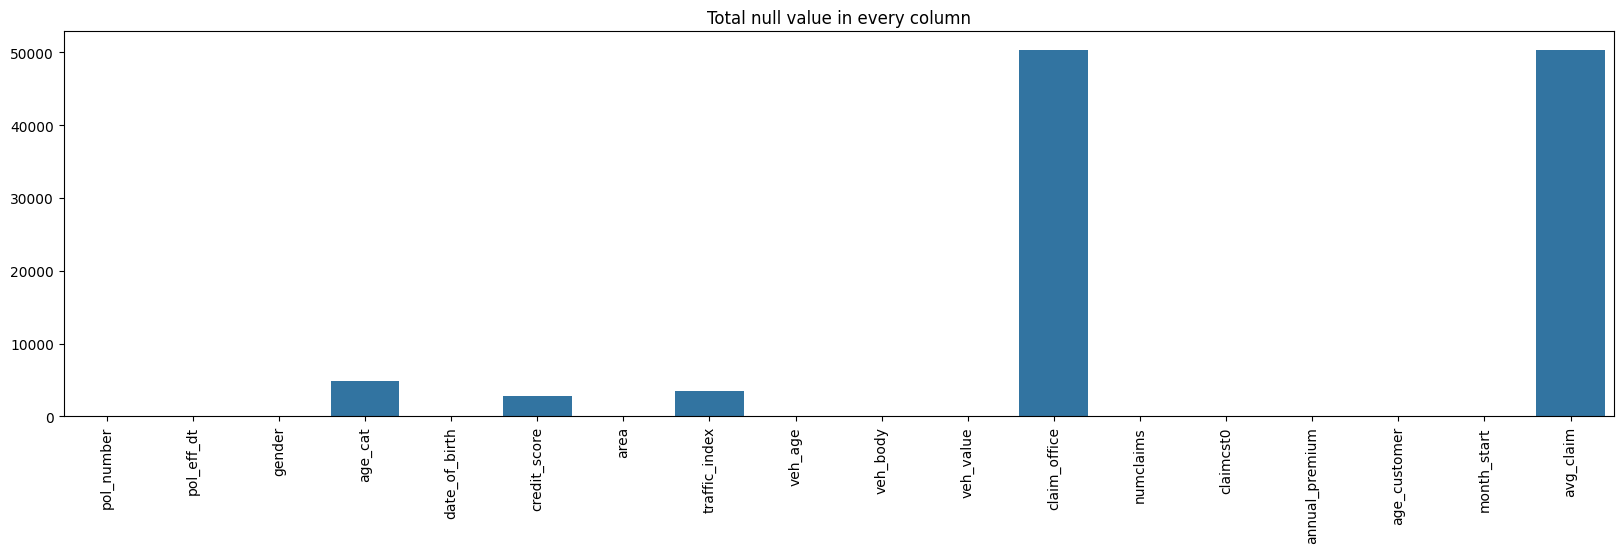

In [243]:
plt.figure(figsize=(20, 5))
plt.title('Total null value in every column')
plt.xticks(rotation=90)
sns.barplot(data=data.isnull().sum())

In [244]:
# check why many null value in claim office
data[data['claim_office'].isnull()]

,pol_number,pol_eff_dt,gender,age_cat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium,age_customer,month_start,avg_claim
0,43124327,2020-12-30,F,4.0,1968-07-12,381.0,D,133.6,2,HBACK,1.331,NaN,0,0.0,716.53,52,12,NaN
1,21919609,2020-12-30,F,2.0,1982-11-05,549.0,D,163.6,1,UTE,3.740,NaN,0,0.0,716.53,38,12,NaN
2,72577057,2020-12-30,M,2.0,1983-11-26,649.0,B,117.5,4,COUPE,0.880,NaN,0,0.0,716.53,37,12,NaN
3,92175225,2020-12-30,M,4.0,1960-11-02,743.0,B,100.7,3,SEDAN,1.045,NaN,0,0.0,716.53,60,12,NaN
4,66223239,2020-12-30,F,4.0,1968-01-04,817.0,C,115.5,4,HBACK,0.473,NaN,0,0.0,716.53,52,12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60387,73248694,2020-01-02,F,5.0,1956-05-10,809.0,C,145.5,4,HBACK,0.891,NaN,0,0.0,716.53,64,1,NaN
60388,71411764,2020-01-02,M,4.0,1961-03-22,681.0,D,86.3,1,HBACK,1.881,NaN,0,0.0,716.53,59,1,NaN
60389,89353155,2020-01-02,M,4.0,1965-09-29,773.0,F,110.0,1,STNWG,5.170,NaN,0,0.0,716.53,55,1,NaN
60390,40916605,2020-01-02,M,3.0,1978-08-01,714.0,B,NaN,1,HBACK,1.903,NaN,0,0.0,716.53,42,1,NaN


In [245]:
# check claim office with null value and numclaims
data[data['claim_office'].isnull()].value_counts('numclaims')

numclaims
0    50362
Name: count, dtype: int64

In [246]:
# check claim office with null value and claimcst0
data[data['claim_office'].isnull()].value_counts('claimcst0')

claimcst0
0.0    50362
Name: count, dtype: int64

Setelah dilihat bahwa nilai null value pada claim office karena customer tersebut belum pernah melakukan claim asuransi, sehingg tidak pernah mendatanagi salah satu office 

In [247]:
# Memisahkan categorical dengan numeric
numeric_col = data.select_dtypes('number').columns
categoric_col = data.select_dtypes('object').columns
choose_col = ['gender','area', 'veh_body','claim_office']

Visualize categorical data 

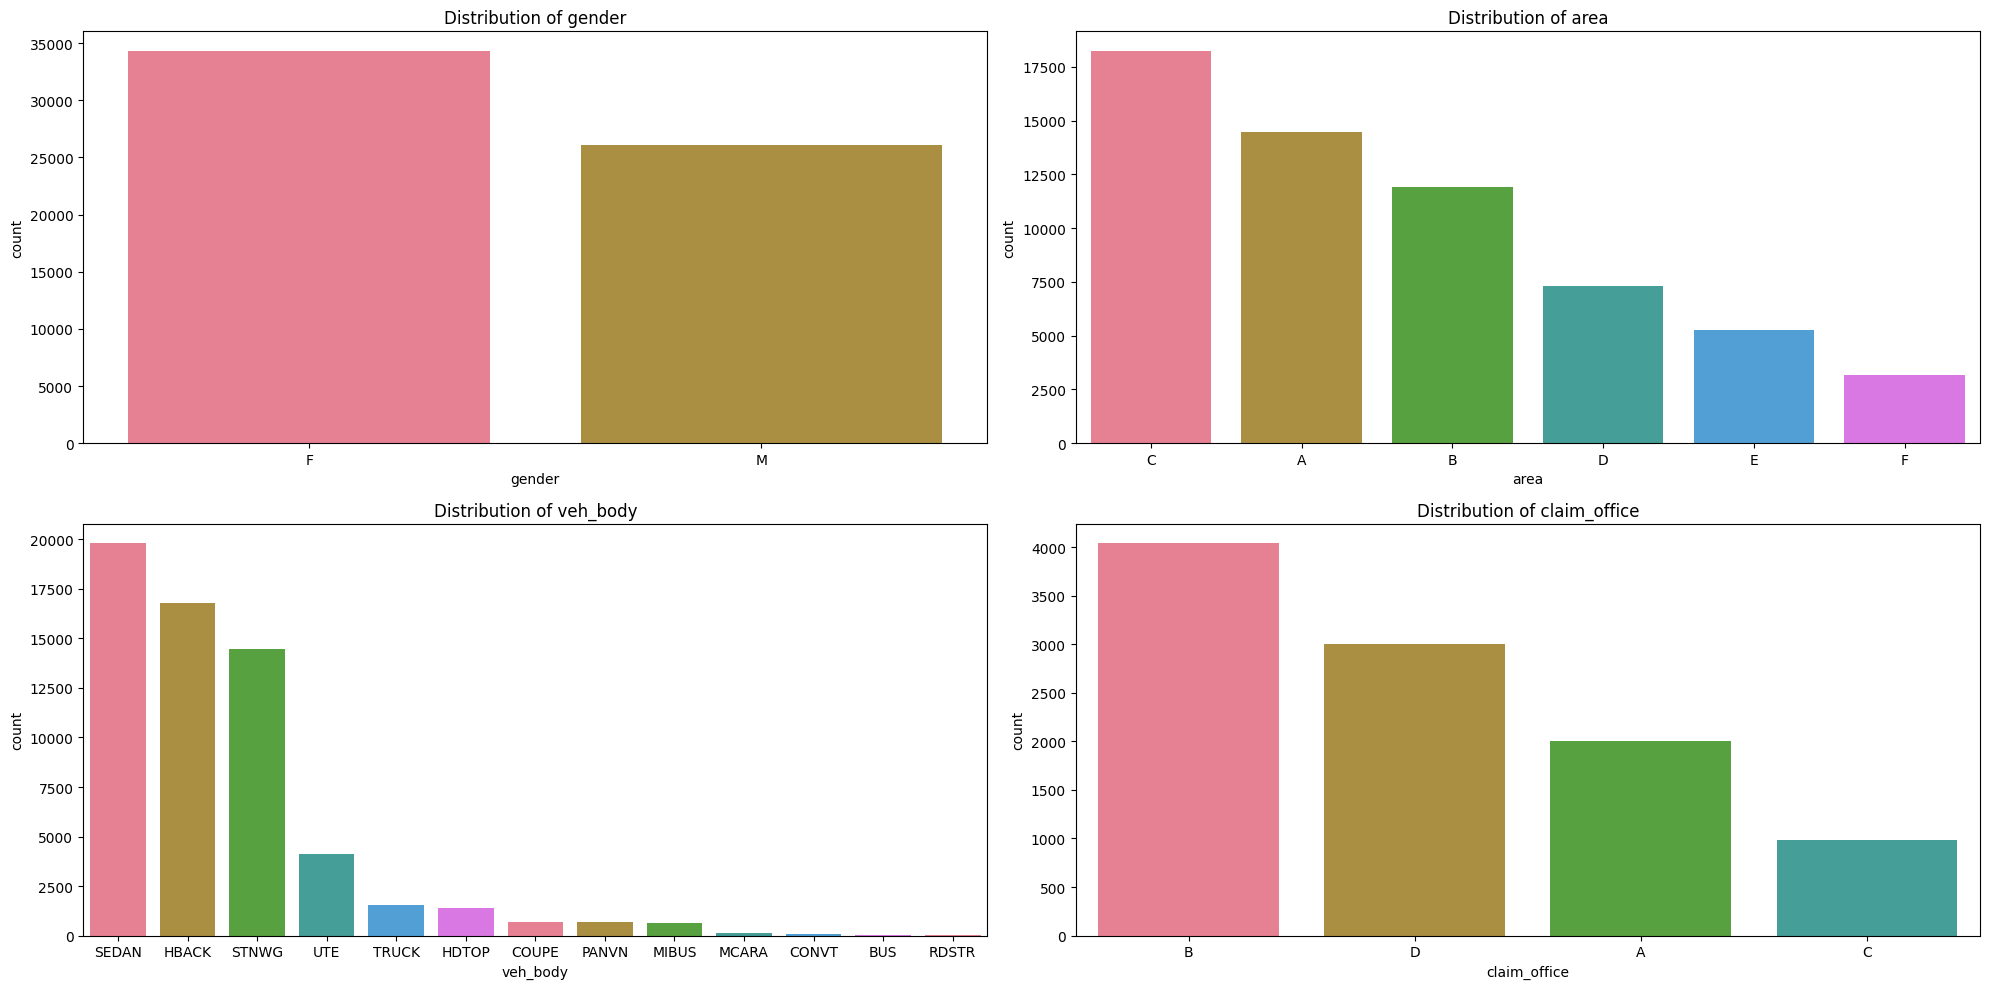

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

# set 2 plot for evey row
n_cols = 2  
n_rows = (len(choose_col) + n_cols - 1) // n_cols 

# Create the subplots with n_rows rows and 2 columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

axes = axes.flatten()

# Plot each column in the corresponding subplot
for i, col in enumerate(choose_col):
    sns.countplot(data=data, 
                  x=col, 
                  ax=axes[i], 
                  palette = sns.color_palette("husl"),
                  order = data[col].value_counts().index
                  )  
    axes[i].set_title(f'Distribution of {col}')  

plt.tight_layout()
plt.show()


- Gender terbanyak wanita
- Tiga 4 mobil terbanyak yaitu sedan, hatchback, station wagon dan utilty
- Customer terbanyak dri area C
- Office yang paling banyak di datangi untuk melakukan claim yaitu B

Correlation between claim office and residence

Apakah yang dimaksud disini sama 

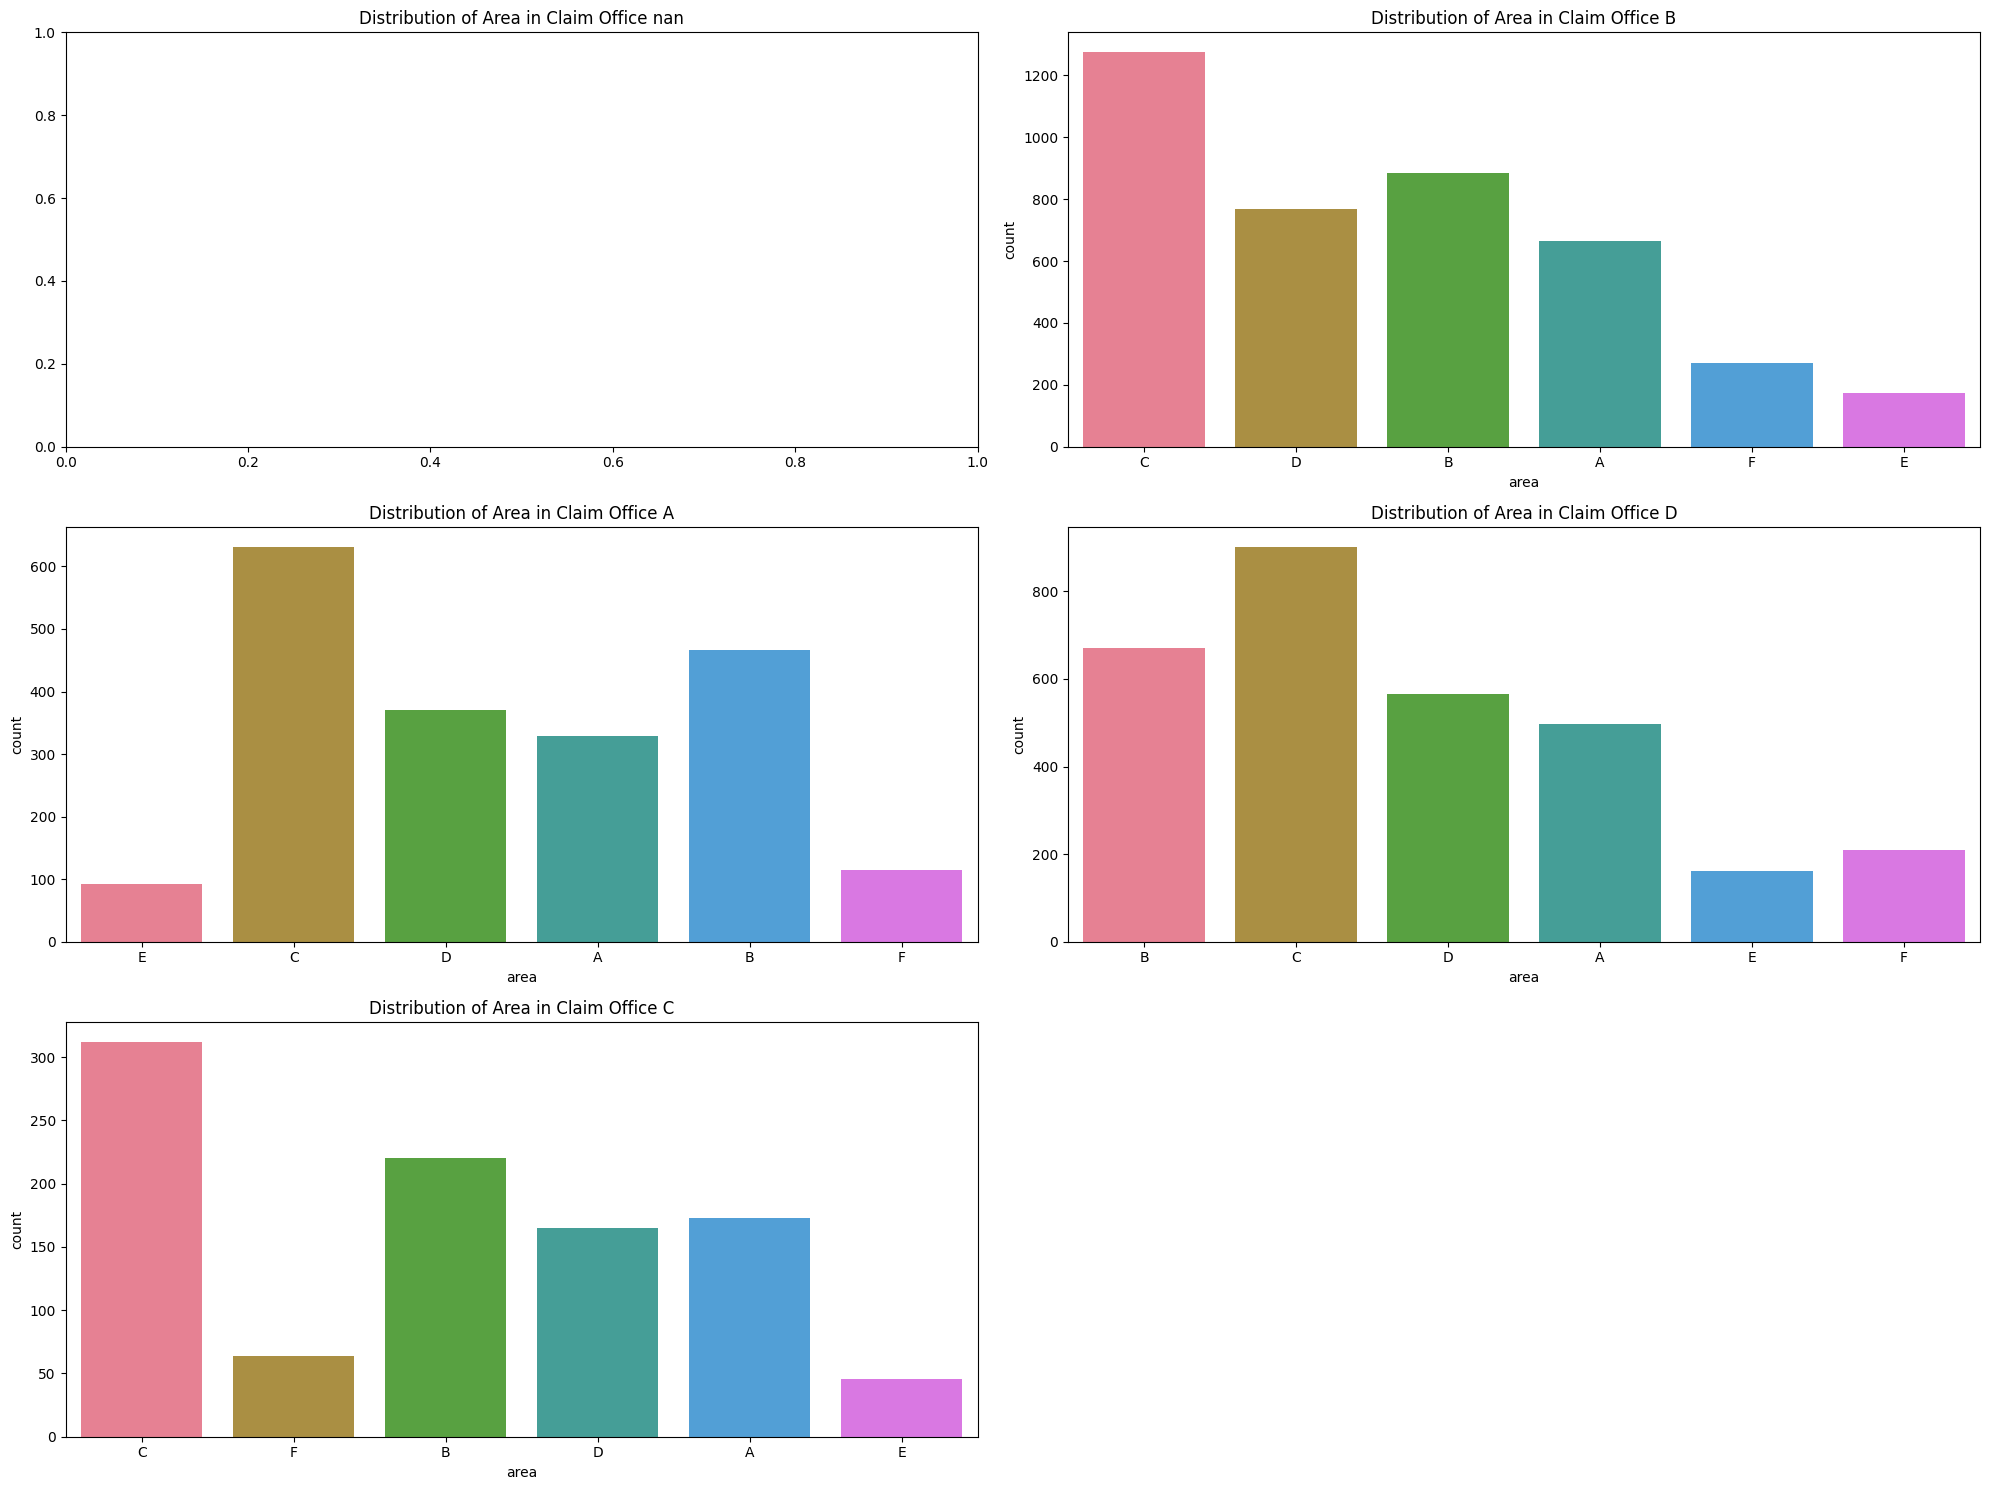

In [249]:
# Calculate the number of rows and columns
n_cols = 2
n_rows = (len(data['claim_office'].unique()) + n_cols - 1) // n_cols

# Create the subplots with n_rows rows and 2 columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten axes to ensure we can index easily
axes = axes.flatten()

# Plot each claim_office in the corresponding subplot
for i, col in enumerate(data['claim_office'].unique()):
    sns.countplot(data=data[data['claim_office'] == col], 
                  x='area', 
                  ax=axes[i],
                  palette=sns.color_palette("husl")) 
    axes[i].set_title(f'Distribution of Area in Claim Office {col}')  

# Hide any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Tight layout to avoid overlap
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Age dist based on gender')

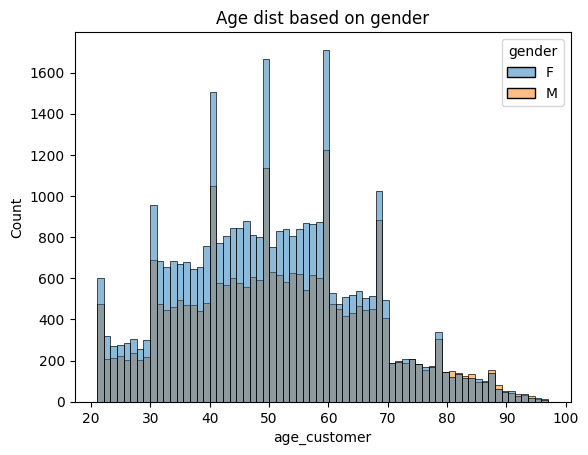

In [250]:
sns.histplot(data=data, x = 'age_customer', hue='gender')
plt.title('Age dist based on gender')

visualize numeric data

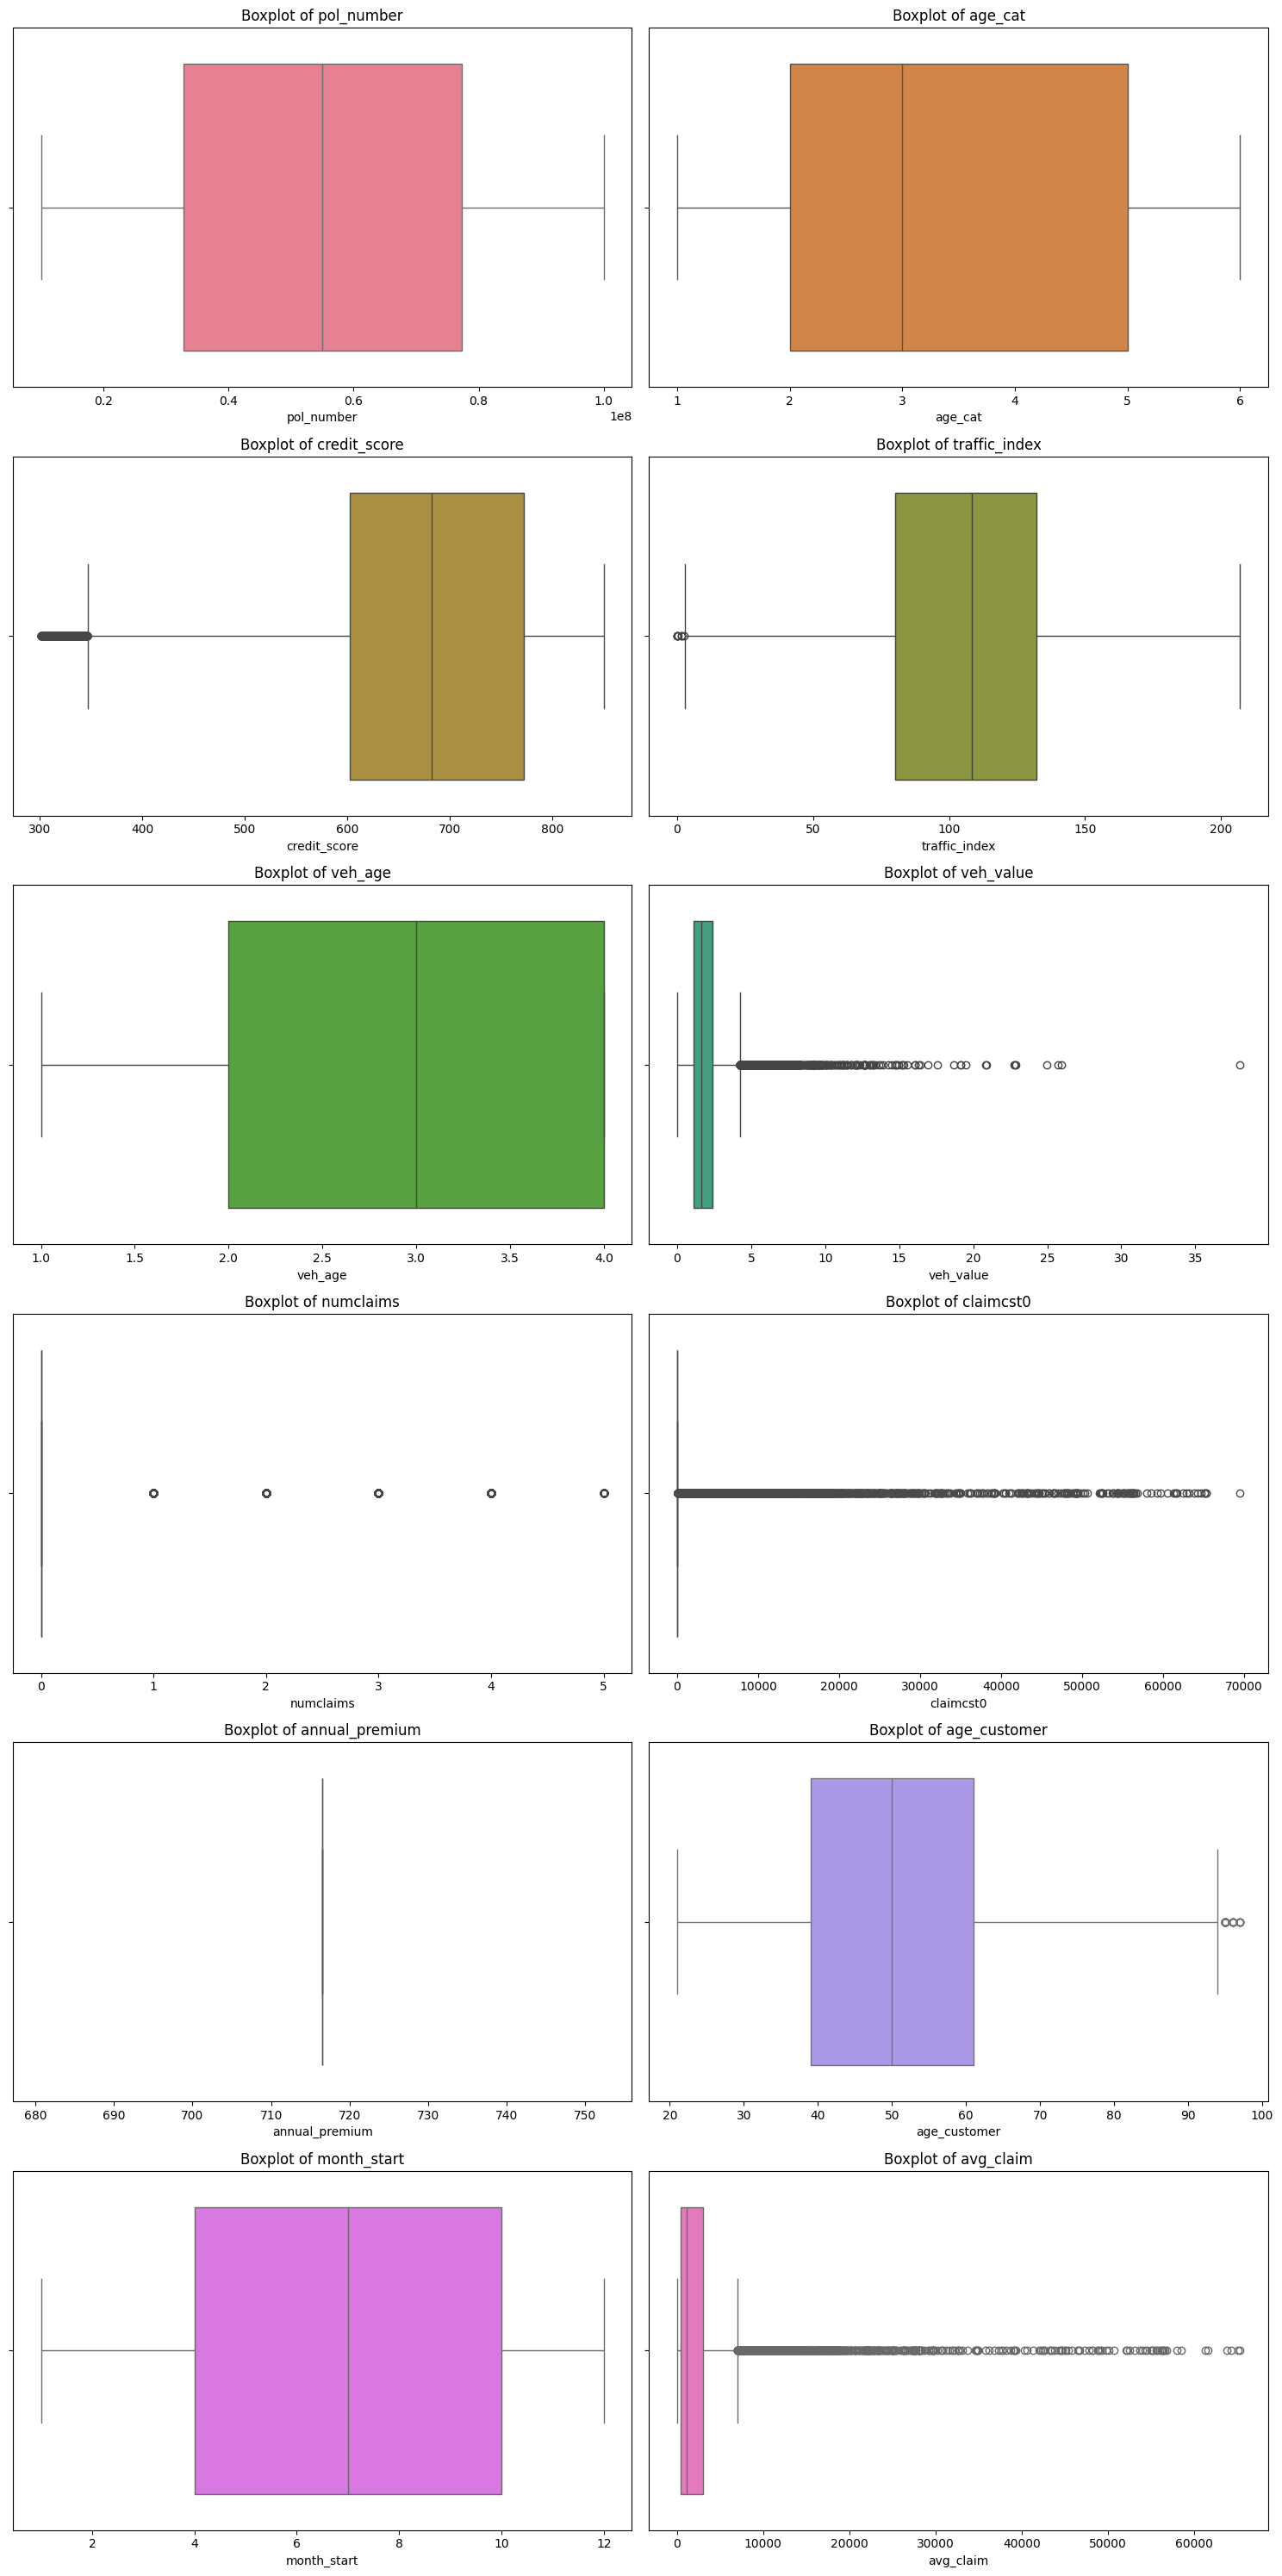

In [251]:
n_rows = (len(numeric_col) + n_cols - 1) // n_cols  
palettes = sns.color_palette("husl", len(numeric_col))  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()
for i, x in enumerate(numeric_col):
    sns.boxplot(data=data, x=data[x], ax=axes[i], color=palettes[i])
    axes[i].set_title(f'Boxplot of {x}')

for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- Annual premium yaitu cost dari sebuh asuransi tiap tahunnya. Semua memiliki harga yang sama.
- Nilai claim terbanyak bernilai 0 karena pasti lebih sedikit yang mengeclaim asuransi
- sama seperti column sebelumnya yaitu column numclaims yaitu nilai terbanyaknya yaitu 0

In [252]:
data[['credit_score']].describe().T

,count,mean,std,min,25%,50%,75%,max
credit_score,57591.0,662.19319,136.450182,301.0,602.0,682.0,772.0,850.0


pada deskripsi data disebutkan bahwa nilai kredit score berkisar 1 - 100 , tetapi setelah diamati terlihat bahwa rentang tidak sesuai yaitu 300 - 850, seperti penilain fico score

<a href = "https://www.investopedia.com/terms/f/ficoscore.asp#:~:text=A%20FICO%20score%20ranges%20from,determine%20whether%20to%20extend%20credit."> Fico score </a>

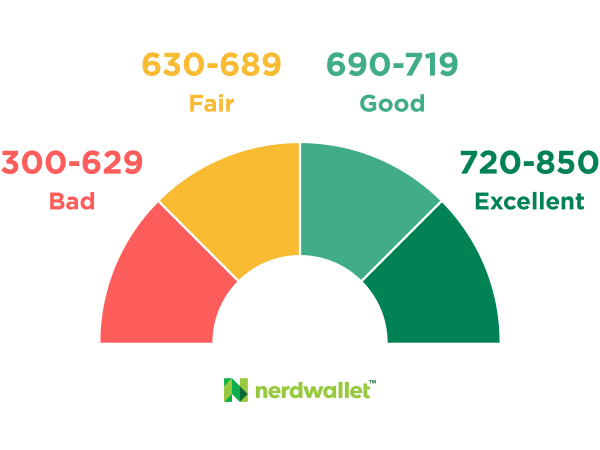

Text(0.5, 1.0, 'Age dist based on gender')

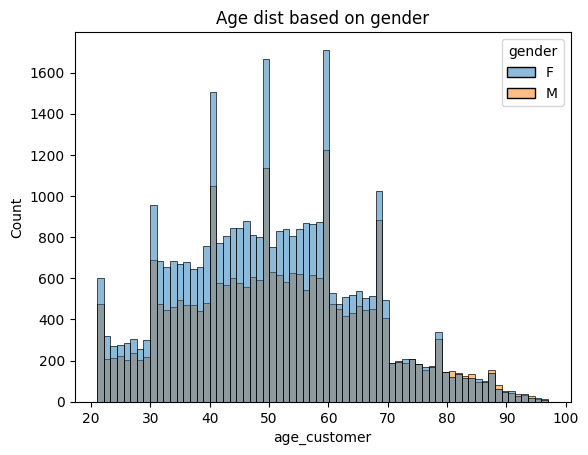

In [253]:
sns.histplot(data=data, x = 'age_customer', hue='gender')
plt.title('Age dist based on gender')

<Axes: xlabel='area', ylabel='traffic_index'>

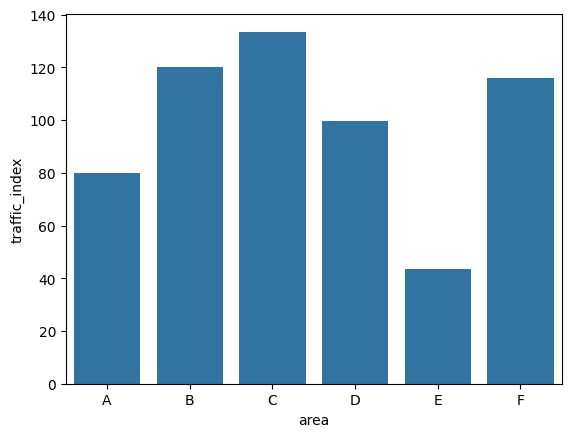

In [254]:
sns.barplot(data.groupby('area')['traffic_index'].median())

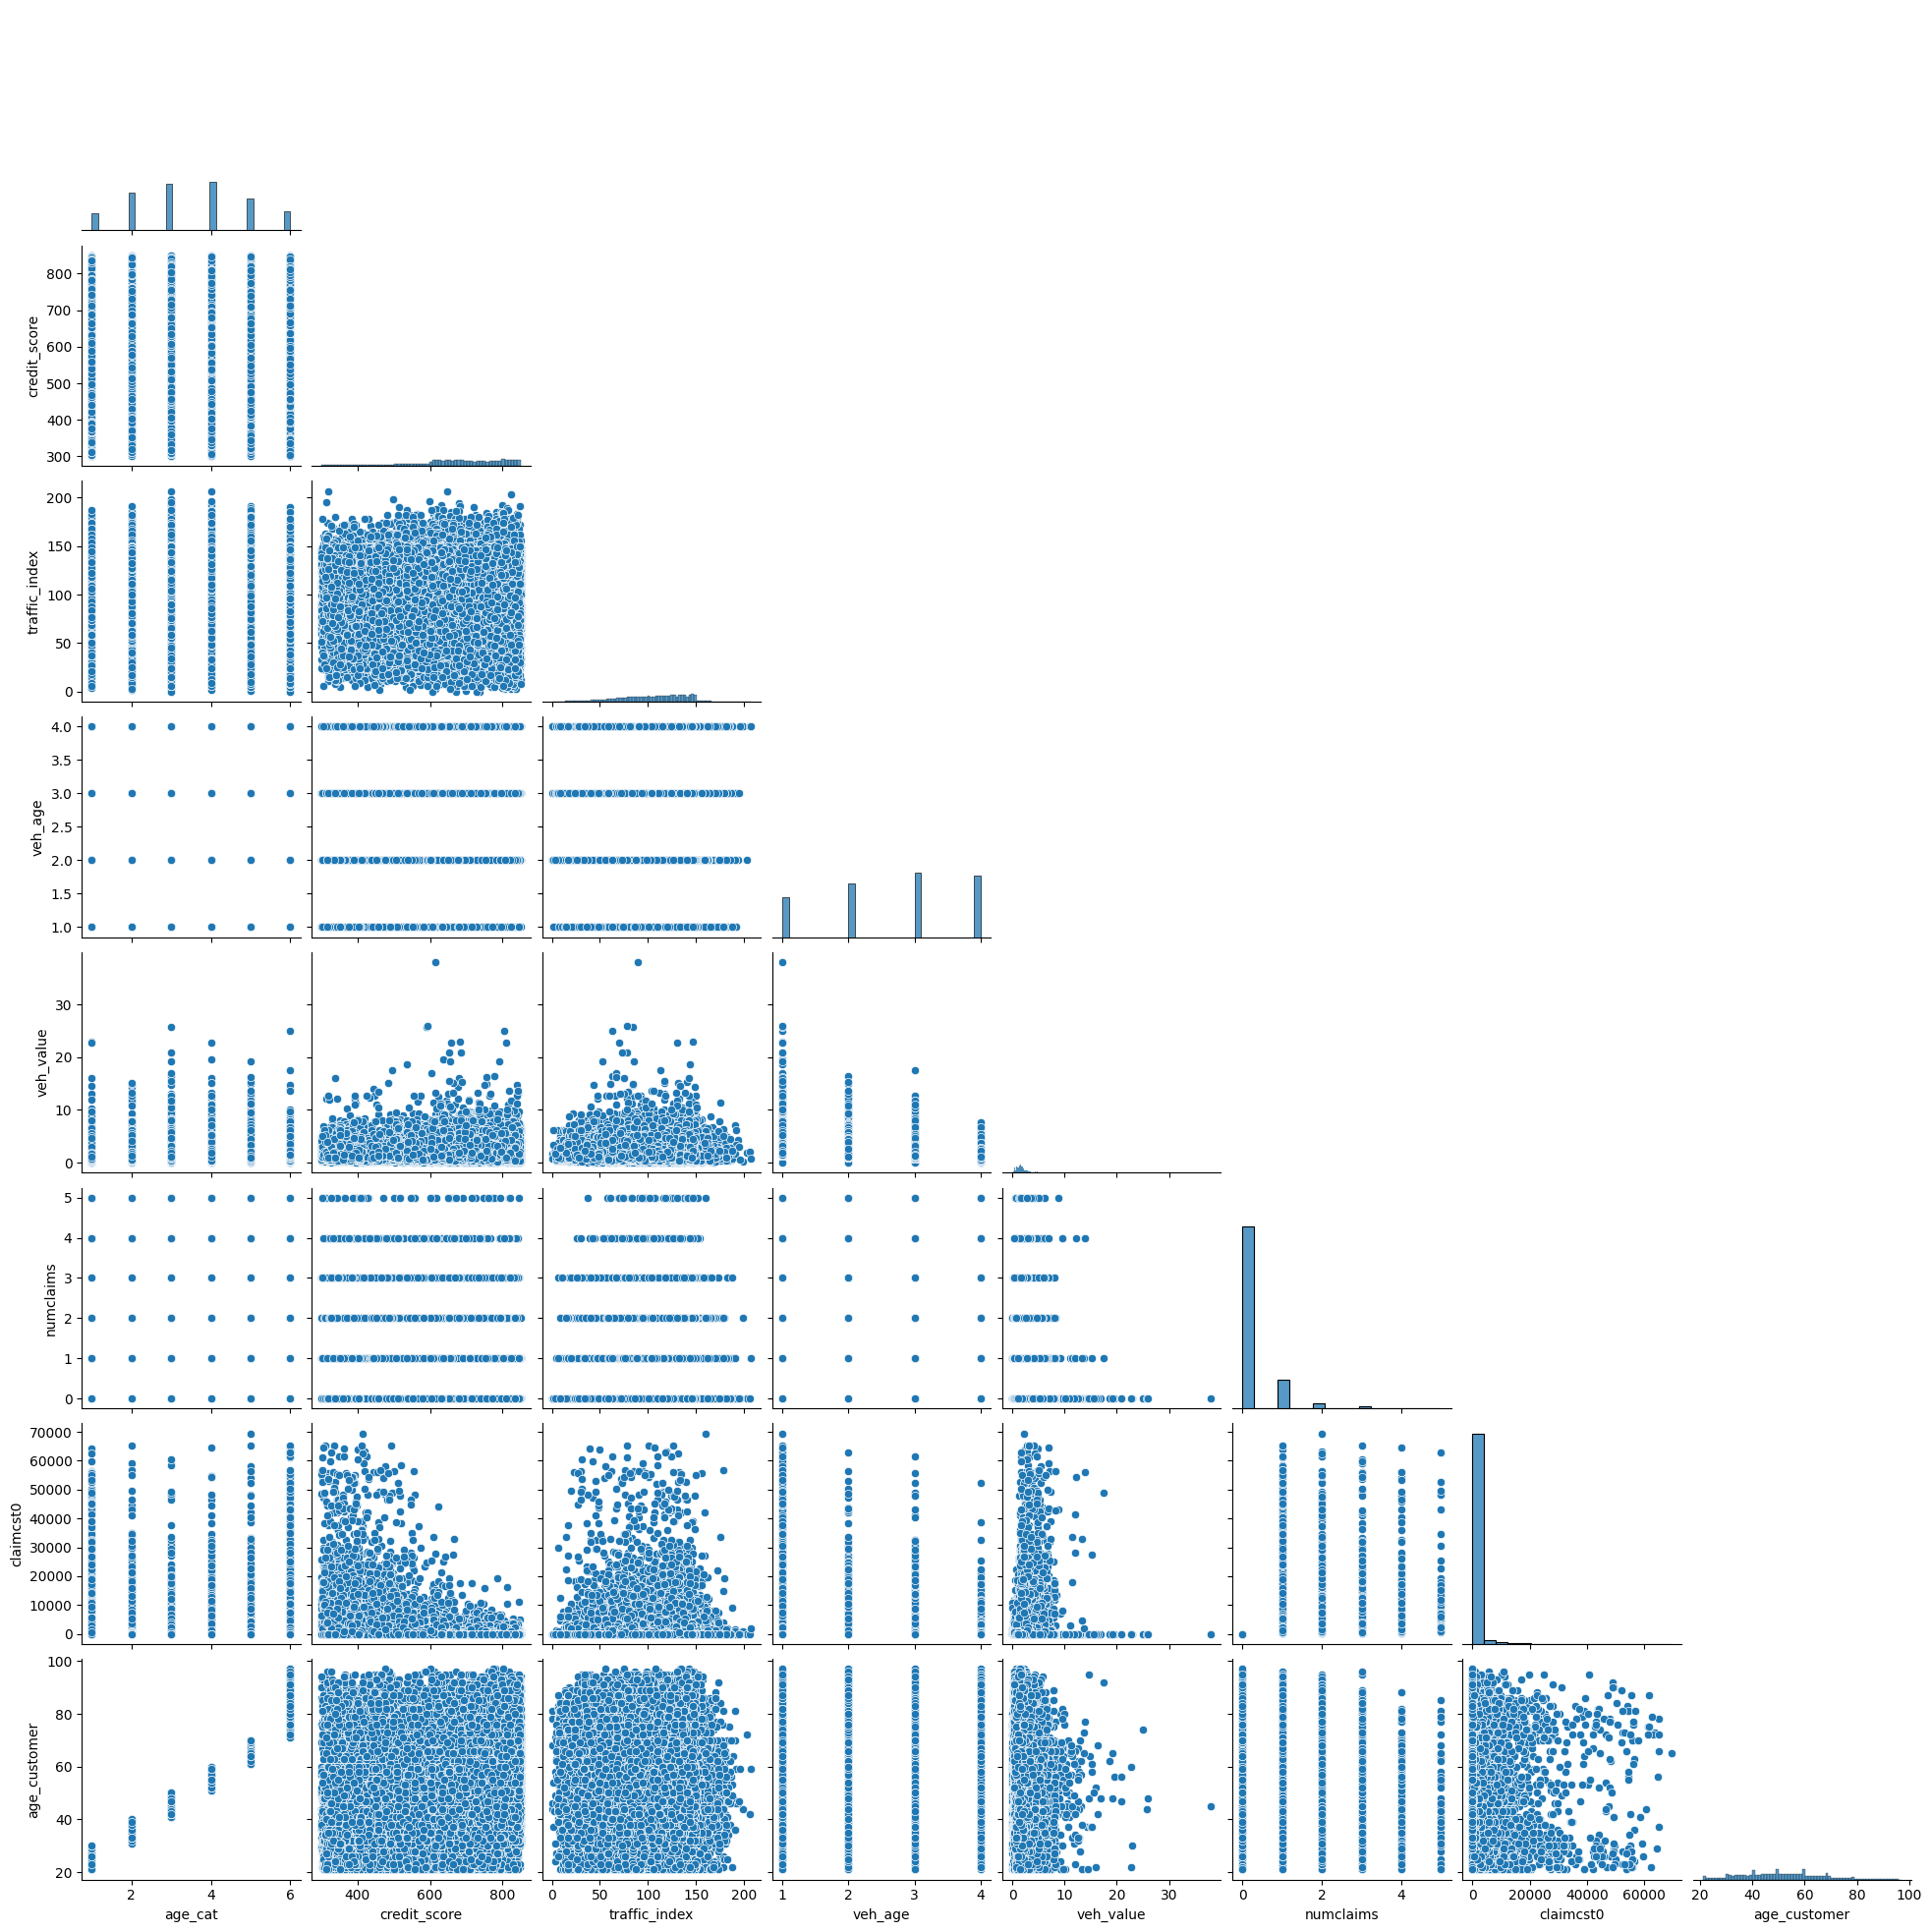

In [255]:
select_features_numeric =  ['age_cat', 'credit_score', 'traffic_index', 'veh_age',
                            'veh_value', 'numclaims', 'claimcst0', 'age_customer']

sns.pairplot(data=data[select_features_numeric], corner=True)

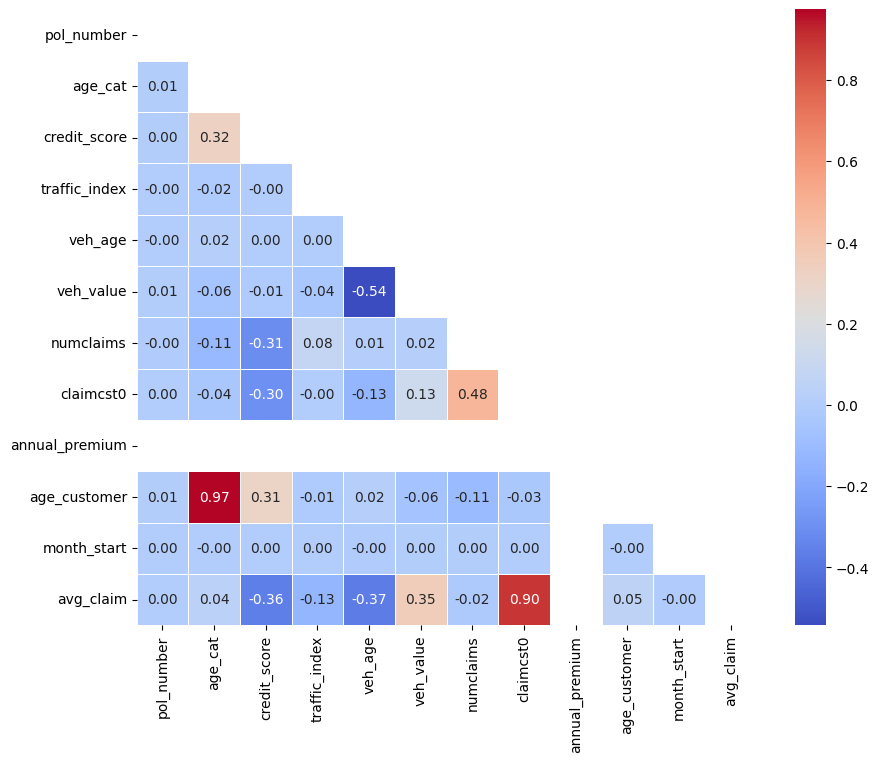

In [256]:
plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric_col].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.show()

- age cat dan age customer memiliki corr positif yang sgt tinggi, sangat wajar karena data tersebut sangat relevan
- veh age and veh value memeliki corr negatif yg lumyan tinggi, semakin tua usia kendaraan semakin rendah nilai tersebut

<Axes: xlabel='numclaims', ylabel='claimcst0'>

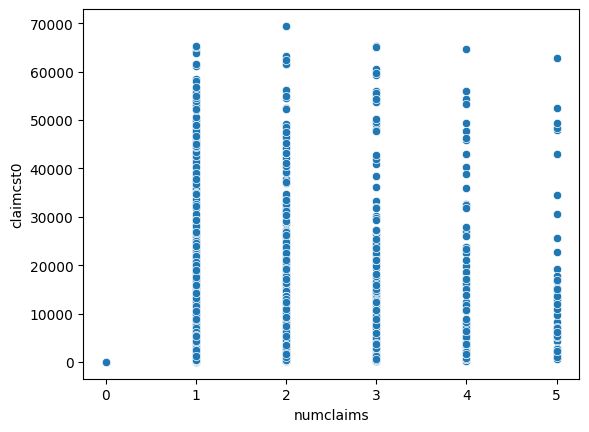

In [257]:
# jumlah claim terhadap total claim
sns.scatterplot(data=data, x ='numclaims', y = 'claimcst0')

# Preprocessing

In [258]:
data.head()

,pol_number,pol_eff_dt,gender,age_cat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium,age_customer,month_start,avg_claim
0,43124327,2020-12-30,F,4.0,1968-07-12,381.0,D,133.6,2,HBACK,1.331,NaN,0,0.0,716.53,52,12,NaN
1,21919609,2020-12-30,F,2.0,1982-11-05,549.0,D,163.6,1,UTE,3.740,NaN,0,0.0,716.53,38,12,NaN
2,72577057,2020-12-30,M,2.0,1983-11-26,649.0,B,117.5,4,COUPE,0.880,NaN,0,0.0,716.53,37,12,NaN
3,92175225,2020-12-30,M,4.0,1960-11-02,743.0,B,100.7,3,SEDAN,1.045,NaN,0,0.0,716.53,60,12,NaN
4,66223239,2020-12-30,F,4.0,1968-01-04,817.0,C,115.5,4,HBACK,0.473,NaN,0,0.0,716.53,52,12,NaN


- pol number tidak dipakai  karena semua unique tiap row
- pol_eff_dt tidak dipaki hanya penanda saja dimulai polis
- Claim office hanya menyatakan kantor agent nya saja dan banyak sekali nilai null
- Annual premium hanya 1 nilai unik , yaitu seperti tujuan awalnya yaitu ingin mensegmenatsi harga

In [259]:
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['area'] = le.fit_transform(data['area'])
data['veh_body'] = le.fit_transform(data['veh_body'])

In [260]:
df_train = data.copy()

In [261]:
# df_train = df_train.sample(frac=0.05)
df_train = df_train.sample(frac = 0.05)
df_train

,pol_number,pol_eff_dt,gender,age_cat,date_of_birth,credit_score,area,traffic_index,veh_age,veh_body,veh_value,claim_office,numclaims,claimcst0,annual_premium,age_customer,month_start,avg_claim
49656,41532093,2020-03-06,0,6.0,1943-04-07,824.0,2,99.0,2,9,1.7160,NaN,0,0.000000,716.53,77,3,NaN
51841,56924691,2020-02-22,1,5.0,1959-03-06,737.0,2,112.5,4,9,0.4510,NaN,0,0.000000,716.53,61,2,NaN
1050,96881237,2020-12-24,1,3.0,1974-11-24,NaN,3,109.5,4,10,1.0670,NaN,0,0.000000,716.53,46,12,NaN
11404,46184596,2020-10-23,0,5.0,1950-07-18,816.0,2,138.0,1,3,1.3970,NaN,0,0.000000,716.53,70,10,NaN
52891,14125912,2020-02-16,0,3.0,1973-02-21,754.0,3,106.5,2,10,3.0250,NaN,0,0.000000,716.53,47,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24126,89135905,2020-08-08,1,4.0,1963-01-19,753.0,0,83.9,3,4,1.9690,NaN,0,0.000000,716.53,57,8,NaN
32950,86523821,2020-06-15,0,4.0,1968-02-28,620.0,0,66.0,3,3,1.0010,NaN,0,0.000000,716.53,52,6,NaN
41069,24784634,2020-04-28,1,5.0,1954-08-15,722.0,2,144.0,2,10,4.5430,NaN,0,0.000000,716.53,66,4,NaN
21146,33588237,2020-08-26,0,1.0,1998-04-02,436.0,3,61.1,4,3,0.8470,B,1,3191.158292,716.53,22,8,3191.158292


In [262]:
df_train.columns

Index(['pol_number', 'pol_eff_dt', 'gender', 'age_cat', 'date_of_birth',
       'credit_score', 'area', 'traffic_index', 'veh_age', 'veh_body',
       'veh_value', 'claim_office', 'numclaims', 'claimcst0', 'annual_premium',
       'age_customer', 'month_start', 'avg_claim'],
      dtype='object')

In [263]:
select_features = ['gender', 'age_customer', 'credit_score', 'area', 'traffic_index', 
                   'veh_value', 'avg_claim']

drop null value

In [264]:
df_train = df_train[select_features]

In [265]:
df_train.dropna(inplace=True)

In [266]:
df_train

,gender,age_customer,credit_score,area,traffic_index,veh_value,avg_claim
26499,0,36,710.0,1,152.4,0.781,135.179381
11274,1,62,829.0,2,132.0,3.058,328.275162
22795,0,75,765.0,2,130.5,1.804,204.111948
37967,0,50,379.0,0,87.0,0.924,3452.807375
8316,0,32,321.0,5,144.0,0.726,1395.807266
...,...,...,...,...,...,...,...
45460,1,28,392.0,1,126.5,1.045,1142.962174
53894,1,65,722.0,3,90.6,2.145,255.215835
59691,1,63,535.0,1,131.9,1.375,1007.325890
15435,1,43,685.0,1,135.3,0.451,116.543193


In [267]:
from sklearn import preprocessing
df_scaled = pd.DataFrame(preprocessing.normalize(df_train), columns=df_train.columns)

In [268]:
df_train

,gender,age_customer,credit_score,area,traffic_index,veh_value,avg_claim
26499,0,36,710.0,1,152.4,0.781,135.179381
11274,1,62,829.0,2,132.0,3.058,328.275162
22795,0,75,765.0,2,130.5,1.804,204.111948
37967,0,50,379.0,0,87.0,0.924,3452.807375
8316,0,32,321.0,5,144.0,0.726,1395.807266
...,...,...,...,...,...,...,...
45460,1,28,392.0,1,126.5,1.045,1142.962174
53894,1,65,722.0,3,90.6,2.145,255.215835
59691,1,63,535.0,1,131.9,1.375,1007.325890
15435,1,43,685.0,1,135.3,0.451,116.543193


In [269]:
df_scaled

,gender,age_customer,credit_score,area,traffic_index,veh_value,avg_claim
0,0.000000,0.048680,0.960076,0.001352,0.206078,0.001056,0.182792
1,0.001107,0.068623,0.917557,0.002214,0.146101,0.003385,0.363343
2,0.000000,0.093058,0.949195,0.002482,0.161921,0.002238,0.253258
3,0.000000,0.014389,0.109065,0.000000,0.025036,0.000266,0.993615
4,0.000000,0.022225,0.222943,0.003473,0.100012,0.000504,0.969426
...,...,...,...,...,...,...,...
428,0.000823,0.023041,0.322569,0.000823,0.104094,0.000860,0.940521
429,0.001292,0.083994,0.932979,0.003877,0.117075,0.002772,0.329794
430,0.000870,0.054787,0.465252,0.000870,0.114704,0.001196,0.876001
431,0.001410,0.060632,0.965877,0.001410,0.190778,0.000636,0.164331


# modeling

K-means

In [270]:
wcss = []
scores = []
for i in range(2, 15):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(df_train)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(df_train, labels)
    scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

wcss score for n_cluster = 2 is [4674477979.937271]
silhoutte score for n_clusters = 2 is 0.847804116307383
wcss score for n_cluster = 3 is [4674477979.937271, 2591575519.4899263]
silhoutte score for n_clusters = 3 is 0.722316231599381
wcss score for n_cluster = 4 is [4674477979.937271, 2591575519.4899263, 1274448418.4367237]
silhoutte score for n_clusters = 4 is 0.7081502729842377
wcss score for n_cluster = 5 is [4674477979.937271, 2591575519.4899263, 1274448418.4367237, 725341236.0943235]
silhoutte score for n_clusters = 5 is 0.6907357094263664
wcss score for n_cluster = 6 is [4674477979.937271, 2591575519.4899263, 1274448418.4367237, 725341236.0943235, 490540181.2199193]
silhoutte score for n_clusters = 6 is 0.6349916329183909
wcss score for n_cluster = 7 is [4674477979.937271, 2591575519.4899263, 1274448418.4367237, 725341236.0943235, 490540181.2199193, 306721013.06623167]
silhoutte score for n_clusters = 7 is 0.6369260128222435
wcss score for n_cluster = 8 is [4674477979.937271, 2

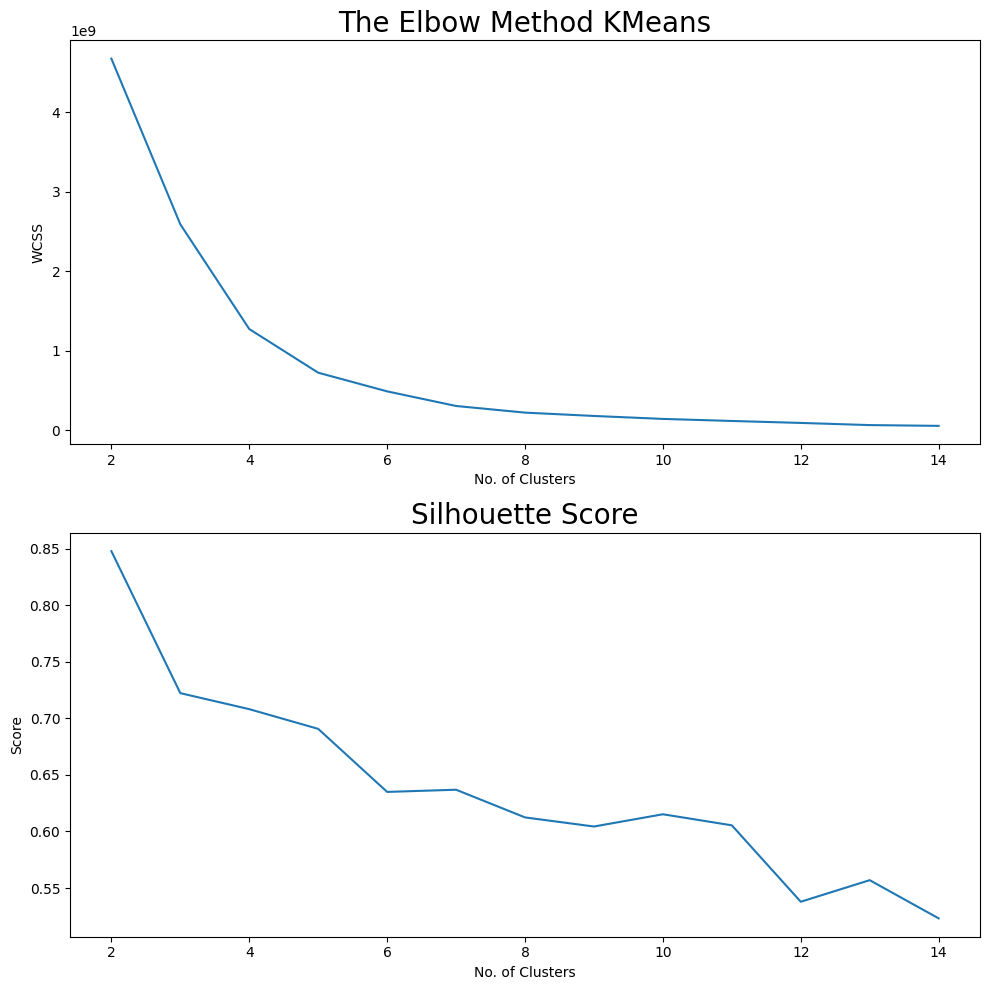

In [271]:
# Create a subplot with 2 rows
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Elbow method plot
ax[0].plot(range(2, 15), wcss)
ax[0].set_title('The Elbow Method KMeans', fontsize=20)
ax[0].set_xlabel('No. of Clusters')
ax[0].set_ylabel('WCSS')

# Silhouette score plot
ax[1].plot(range(2, 15), scores)
ax[1].set_title('Silhouette Score', fontsize=20)
ax[1].set_xlabel('No. of Clusters')
ax[1].set_ylabel('Score')
# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

k mean with scaling

In [272]:
wcss_scale = []
scores_scale = []
for i in range(2, 15):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(df_scaled)
    wcss_scale.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(df_scaled, labels)
    scores_scale.append(silhouette_avg)
    print('wcss_scale score for n_cluster = ' + str(i) + ' is ' + str(wcss_scale))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

wcss_scale score for n_cluster = 2 is [19.27458979774501]
silhoutte score for n_clusters = 2 is 0.6668913935229287
wcss_scale score for n_cluster = 3 is [19.27458979774501, 7.075409342478645]
silhoutte score for n_clusters = 3 is 0.6602894660774932
wcss_scale score for n_cluster = 4 is [19.27458979774501, 7.075409342478645, 4.486724031584132]
silhoutte score for n_clusters = 4 is 0.6058441000591493
wcss_scale score for n_cluster = 5 is [19.27458979774501, 7.075409342478645, 4.486724031584132, 2.963751935347295]
silhoutte score for n_clusters = 5 is 0.5797115177656063
wcss_scale score for n_cluster = 6 is [19.27458979774501, 7.075409342478645, 4.486724031584132, 2.963751935347295, 2.092611196880407]
silhoutte score for n_clusters = 6 is 0.555077377893438
wcss_scale score for n_cluster = 7 is [19.27458979774501, 7.075409342478645, 4.486724031584132, 2.963751935347295, 2.092611196880407, 1.7592549808413518]
silhoutte score for n_clusters = 7 is 0.5344075872200893
wcss_scale score for n_cl

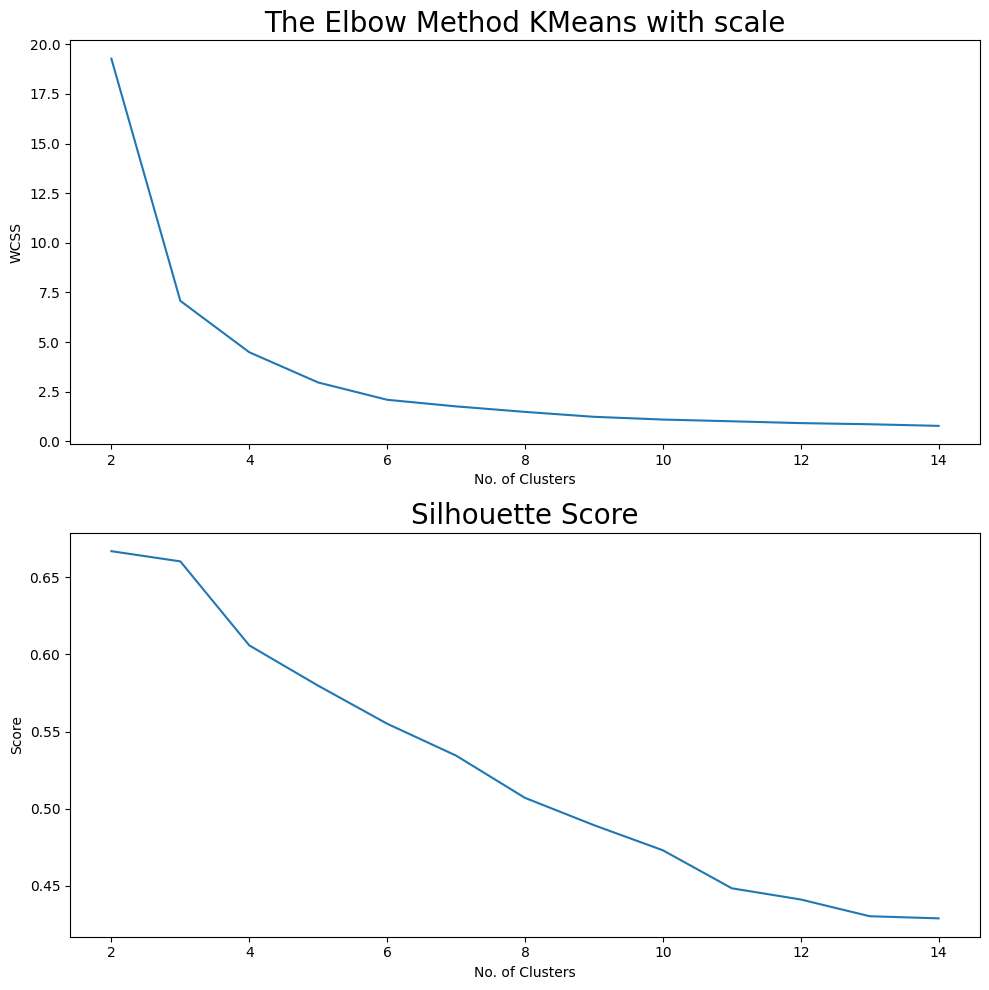

In [273]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))


ax[0].plot(range(2, 15), wcss_scale)
ax[0].set_title('The Elbow Method KMeans with scale', fontsize=20)
ax[0].set_xlabel('No. of Clusters')
ax[0].set_ylabel('WCSS')


ax[1].plot(range(2, 15), scores_scale)
ax[1].set_title('Silhouette Score', fontsize=20)
ax[1].set_xlabel('No. of Clusters')
ax[1].set_ylabel('Score')

plt.tight_layout()


plt.show()

# Hierarchical Clustering

data without scale

In [274]:
linkage_col = ['ward', 'complete', 'average', 'single']
scores_all = [[] for _ in range(len(linkage_col))]
for j in range (len(linkage_col)):
    print('Linkage: ', linkage_col[j])
    scores = []
    for i in range(2, 10):
        AC = AgglomerativeClustering(n_clusters=i, linkage = linkage_col[j]) # Menggunakan Ward Method
        AC.fit(df_train)

        labels = AC.labels_
        silhouette_avg = silhouette_score(df_train, labels)
        scores.append(silhouette_avg)
        print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))
    print("\n##########################\n")
    scores_all[j] = scores

Linkage:  ward
silhoutte score for n_clusters = 2 is 0.8644355339292112
silhoutte score for n_clusters = 3 is 0.722316231599381
silhoutte score for n_clusters = 4 is 0.7281940892843908
silhoutte score for n_clusters = 5 is 0.6763742669801216
silhoutte score for n_clusters = 6 is 0.606958154119512
silhoutte score for n_clusters = 7 is 0.6117209097996955
silhoutte score for n_clusters = 8 is 0.6009192157271588
silhoutte score for n_clusters = 9 is 0.596662974872237

##########################

Linkage:  complete
silhoutte score for n_clusters = 2 is 0.9091923350450694
silhoutte score for n_clusters = 3 is 0.8443239142026961
silhoutte score for n_clusters = 4 is 0.748671793982949
silhoutte score for n_clusters = 5 is 0.7525940153403738
silhoutte score for n_clusters = 6 is 0.681137022660305
silhoutte score for n_clusters = 7 is 0.678166901728909
silhoutte score for n_clusters = 8 is 0.6701696560348231
silhoutte score for n_clusters = 9 is 0.6766620869476905

##########################

Li

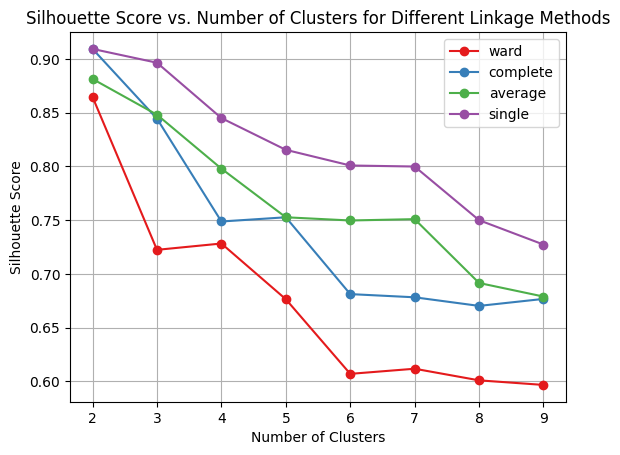

In [275]:
colors = sns.color_palette("Set1", len(linkage_col))

for j in range(len(linkage_col)):
    plt.plot(range(2, 10), scores_all[j], marker='o', color=colors[j], label=linkage_col[j])

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for Different Linkage Methods')
plt.legend()
plt.grid(True)
plt.show()

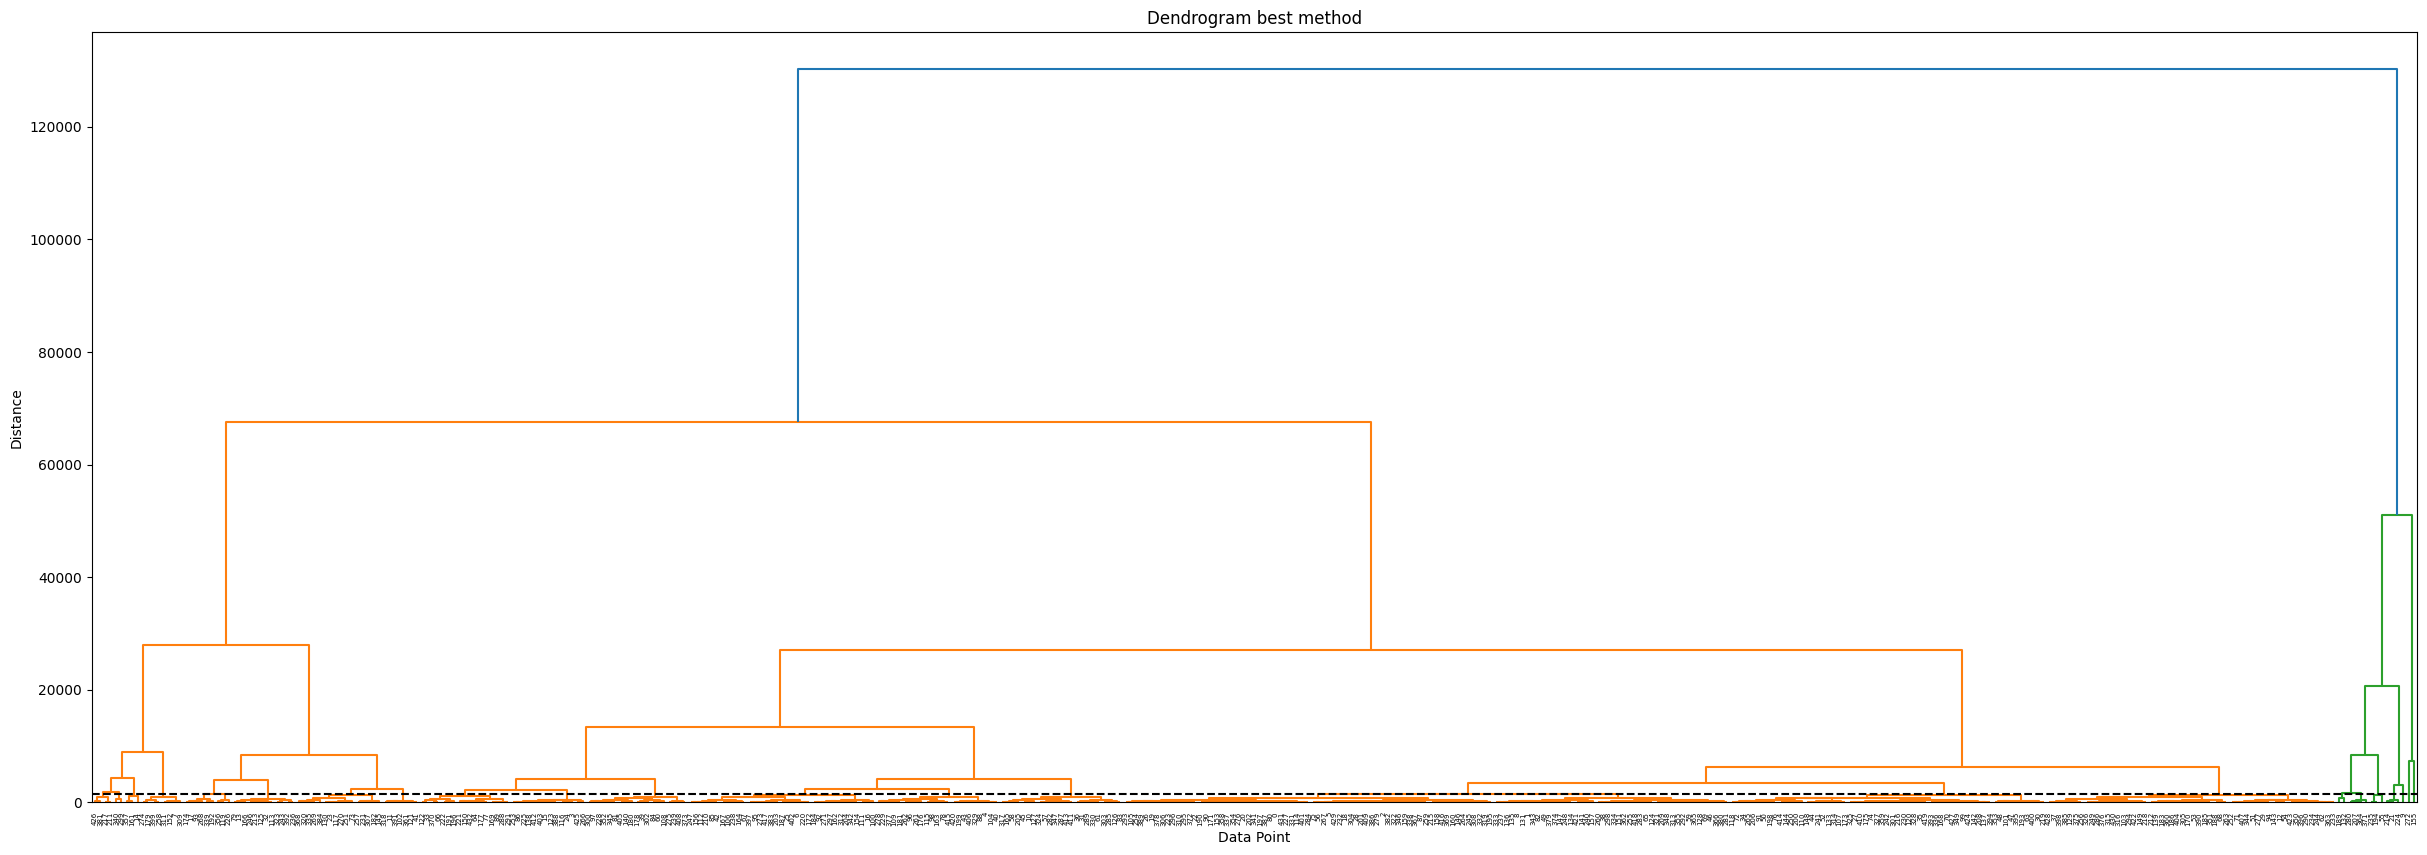

In [276]:
linked = sch.linkage(df_train, 'ward')
plt.figure(figsize=(30, 10))
dendrogram = sch.dendrogram(linked, orientation='top',distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram best method')
plt.xlabel('Data Point')
plt.ylabel('Distance')
plt.axhline(y=1500, color='black', linestyle='--') 
plt.show()

with scalling

In [277]:
linkage_col = ['ward', 'complete', 'average', 'single']
scores_all = [[] for _ in range(len(linkage_col))]
for j in range (len(linkage_col)):
    print('Linkage: ', linkage_col[j])
    scores = []
    for i in range(2, 10):
        AC = AgglomerativeClustering(n_clusters=i, linkage = linkage_col[j]) # Menggunakan Ward Method
        AC.fit(df_scaled)

        labels = AC.labels_
        silhouette_avg = silhouette_score(df_scaled, labels)
        scores.append(silhouette_avg)
        print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))
    print("\n##########################\n")
    scores_all[j] = scores

Linkage:  ward
silhoutte score for n_clusters = 2 is 0.664184033863599
silhoutte score for n_clusters = 3 is 0.6197437823440055
silhoutte score for n_clusters = 4 is 0.5556184471402128
silhoutte score for n_clusters = 5 is 0.5224895280092718
silhoutte score for n_clusters = 6 is 0.5450496461163756
silhoutte score for n_clusters = 7 is 0.5237273839585224
silhoutte score for n_clusters = 8 is 0.4906283815154915
silhoutte score for n_clusters = 9 is 0.4693261005912385

##########################

Linkage:  complete
silhoutte score for n_clusters = 2 is 0.6491709965805809
silhoutte score for n_clusters = 3 is 0.6599926145468882
silhoutte score for n_clusters = 4 is 0.5856018287018306
silhoutte score for n_clusters = 5 is 0.5635569514677266
silhoutte score for n_clusters = 6 is 0.5308183140907239
silhoutte score for n_clusters = 7 is 0.49861416077453646
silhoutte score for n_clusters = 8 is 0.4641845558426382
silhoutte score for n_clusters = 9 is 0.4644671410174538

########################

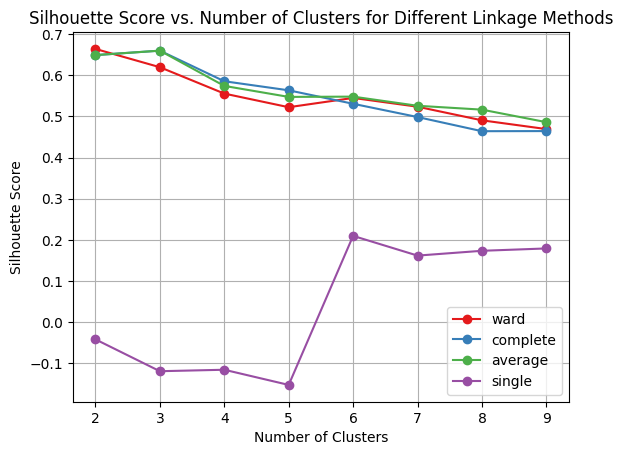

In [278]:
colors = sns.color_palette("Set1", len(linkage_col))

for j in range(len(linkage_col)):
    plt.plot(range(2, 10), scores_all[j], marker='o', color=colors[j], label=linkage_col[j])

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for Different Linkage Methods')
plt.legend()
plt.grid(True)
plt.show()

# DBSCAN

In [279]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

epsilon = np.arange(0.1, 6, 0.1)
min_samples = range(1, 26)

sil_avg = []
max_value = (0, 0, 0, -1)  # Inisialisasi nilai_maks dengan nilai negatif silhouette score

for i in range(len(epsilon)):
    for j in range(len(min_samples)):
        db = DBSCAN(min_samples=min_samples[j], eps=epsilon[i]).fit(df_train)

        # Periksa apakah ada setidaknya dua cluster dan bukan hanya noise
        labels = db.labels_
        unique_labels = set(labels)
        n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)

        # Hitung silhouette score hanya jika jumlah cluster valid berada dalam batas yang benar
        if 2 <= n_clusters_ < len(df_train):
            try:
                silhouette_avg = silhouette_score(df_train, labels)
                sil_avg.append(silhouette_avg)

                if silhouette_avg > max_value[3]:
                    max_value = (epsilon[i], min_samples[j], n_clusters_, silhouette_avg)

            except ValueError as e:
                print(f"Error calculating silhouette score: {e}")

print("epsilon =", max_value[0],
      "\nmin_samples =", max_value[1],
      "\nnumber of clusters =", max_value[2],
      "\naverage silhouette score = %.4f" % max_value[3])


epsilon = 0 
min_samples = 0 
number of clusters = 0 
average silhouette score = -1.0000


# PCA

In [280]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_train)
pca_data = scaler.fit_transform(pca_data)
pca_data = pd.DataFrame(pca_data, columns=["PCA_1", "PCA_2", "PCA_3"]) 
print("PCA explained variance ratio:\n", " ".join(map("{:.3f}".format, pca.explained_variance_ratio_)))

PCA explained variance ratio:
 0.999 0.001 0.000


<Figure size 2000x1000 with 0 Axes>

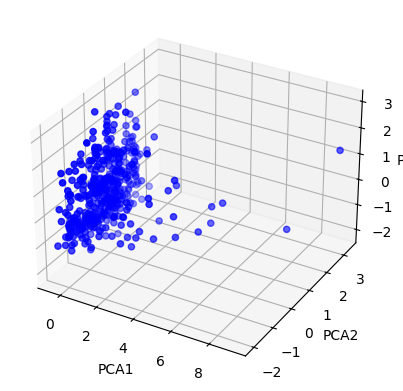

In [281]:
plt.figure(figsize = (20, 10))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = pca_data['PCA_1']
y = pca_data['PCA_2']
z = pca_data['PCA_3']

ax.scatter(x, y, z, c='b', marker='o')
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')

plt.ion()
plt.show()

In [282]:
wcss_PCA = []
scores_PCA = []
for i in range(2, 15):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(pca_data)
    wcss_PCA.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(pca_data, labels)
    scores_PCA.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

wcss score for n_cluster = 2 is [4674477979.937271, 2591575519.4899263, 1274448418.4367237, 725341236.0943235, 490540181.2199193, 306721013.06623167, 223232404.196584, 181185384.05255428, 144127236.2619249, 118257822.81926665, 93592524.34396644, 66365498.95867124, 56664406.303272784]
silhoutte score for n_clusters = 2 is 0.29479534325891055
wcss score for n_cluster = 3 is [4674477979.937271, 2591575519.4899263, 1274448418.4367237, 725341236.0943235, 490540181.2199193, 306721013.06623167, 223232404.196584, 181185384.05255428, 144127236.2619249, 118257822.81926665, 93592524.34396644, 66365498.95867124, 56664406.303272784]
silhoutte score for n_clusters = 3 is 0.3230087377055584
wcss score for n_cluster = 4 is [4674477979.937271, 2591575519.4899263, 1274448418.4367237, 725341236.0943235, 490540181.2199193, 306721013.06623167, 223232404.196584, 181185384.05255428, 144127236.2619249, 118257822.81926665, 93592524.34396644, 66365498.95867124, 56664406.303272784]
silhoutte score for n_clusters

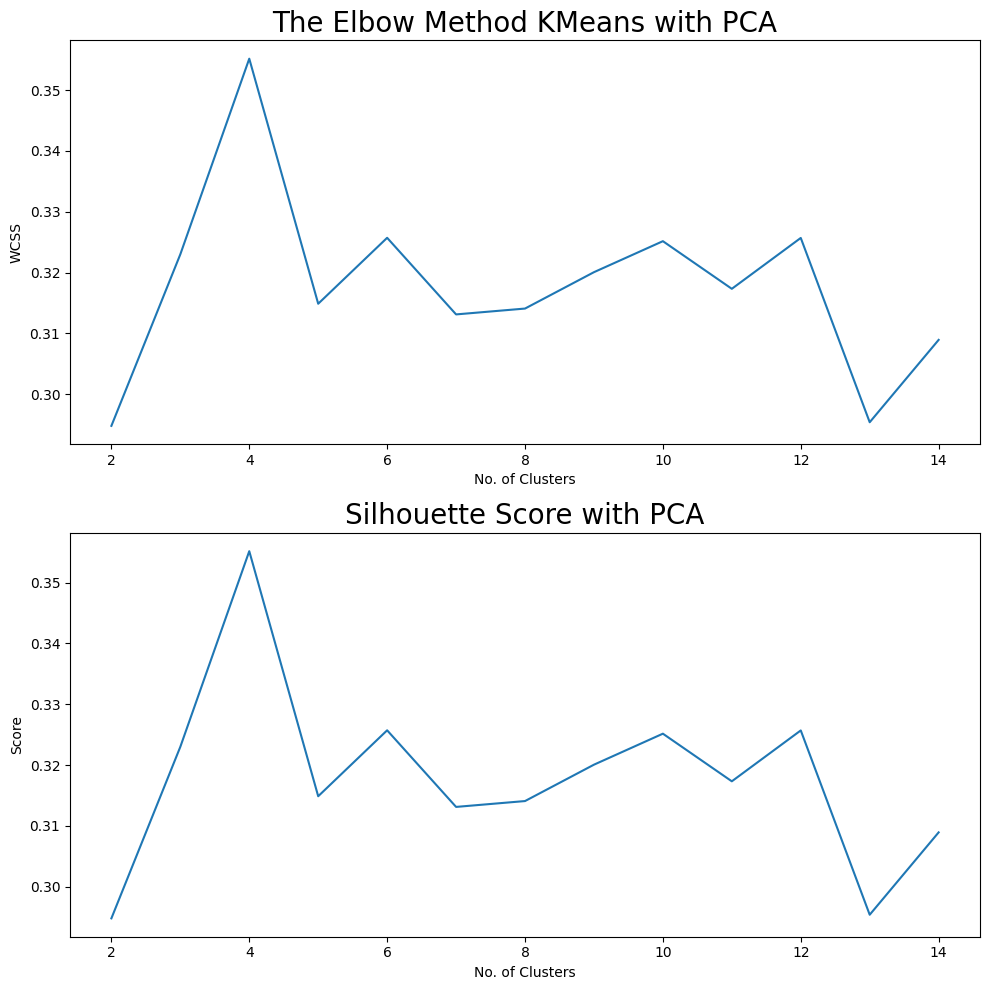

In [283]:
# Create a subplot with 2 rows
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Elbow method plot
ax[0].plot(range(2, 15), scores_PCA)
ax[0].set_title('The Elbow Method KMeans with PCA', fontsize=20)
ax[0].set_xlabel('No. of Clusters')
ax[0].set_ylabel('WCSS')

# Silhouette score plot
ax[1].plot(range(2, 15), scores_PCA)
ax[1].set_title('Silhouette Score with PCA', fontsize=20)
ax[1].set_xlabel('No. of Clusters')
ax[1].set_ylabel('Score')
# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the combined plot
plt.show()

#  Hasil Analysis

In [284]:
# menggunakn salah satu Algortma dengan hasil terbaik
kmeansmodel = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
y_kmeans= kmeansmodel.fit_predict(df_train)


df_train['cluseter'] = y_kmeans

In [285]:
df_train[df_train['cluseter'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
gender,357.0,0.675070,0.469006,0.000000,0.00000,1.000000,1.000000,1.0000
age_customer,357.0,47.529412,16.744020,21.000000,35.00000,46.000000,58.000000,89.0000
credit_score,357.0,583.848739,146.130193,303.000000,463.00000,605.000000,688.000000,846.0000
area,357.0,1.952381,1.367963,0.000000,1.00000,2.000000,3.000000,5.0000
traffic_index,357.0,113.318207,29.776946,19.500000,92.40000,118.500000,136.500000,178.8000
veh_value,357.0,1.825982,1.164239,0.308000,0.97900,1.540000,2.321000,6.8970
avg_claim,357.0,1299.244096,1190.883984,81.495658,332.58429,879.058989,1897.429734,4585.9909
cluseter,357.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0000


In [286]:
df_train[df_train['cluseter'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
gender,15.0,0.733333,0.457738,0.00000,0.500000,1.00000,1.000000,1.00000
age_customer,15.0,45.466667,19.500427,22.00000,30.000000,42.00000,60.000000,80.00000
credit_score,15.0,381.733333,60.026740,322.00000,332.000000,345.00000,425.000000,513.00000
area,15.0,2.266667,1.162919,0.00000,1.500000,2.00000,3.000000,4.00000
traffic_index,15.0,104.480000,30.742669,37.50000,92.100000,110.30000,131.750000,139.50000
veh_value,15.0,3.770103,2.796934,1.43000,1.866425,3.34400,4.575450,12.10000
avg_claim,15.0,26475.168068,10648.857599,18223.22353,18806.000995,23228.10543,28347.370005,53963.06989
cluseter,15.0,1.000000,0.000000,1.00000,1.000000,1.00000,1.000000,1.00000


In [287]:
df_train[df_train['cluseter'] == 2].describe().T

,count,mean,std,min,25%,50%,75%,max
gender,61.0,0.573770,0.498632,0.000000,0.000000,1.00000,1.00000,1.00000
age_customer,61.0,46.459016,20.175541,21.000000,28.000000,43.00000,65.00000,92.00000
credit_score,61.0,444.360656,103.580731,305.000000,362.000000,413.00000,524.00000,750.00000
area,61.0,2.131148,1.466008,0.000000,1.000000,2.00000,3.00000,5.00000
traffic_index,61.0,103.963934,35.551156,16.500000,78.000000,113.80000,132.00000,154.00000
veh_value,61.0,2.526880,1.495579,0.385000,1.606000,2.12300,3.28900,9.29500
avg_claim,61.0,7908.783893,2858.578248,4861.980904,5709.724877,6760.72263,10061.04239,15540.54944
cluseter,61.0,2.000000,0.000000,2.000000,2.000000,2.00000,2.00000,2.00000


- cluster 1: Mewakili kelompok besar dengan skor kredit, nilai kendaraan, dan jumlah klaim ditengah tengah.
- Klaster 2: kendaraan dan jumlah klaim tertinggi, tetapi skor kredit lebih rendah.
- cluster 3: anggota yang lebih tua dengan harga kendaraan lebih tinggi dan jumlah klaim yang tidak terllu besar

THANK YOU